In [2]:
import pandas as pd
import numpy as np
sample = {'names': ['phani','swathi','chaitu','anusha','sweety','sasi'], 
          'age': [37,32,35,30,32,32], 
          'gender': ['m','f','m','f','f','m']}
df = pd.DataFrame(sample)
print(df)
print(type(df))

    names  age gender
0   phani   37      m
1  swathi   32      f
2  chaitu   35      m
3  anusha   30      f
4  sweety   32      f
5    sasi   32      m
<class 'pandas.core.frame.DataFrame'>


In [3]:
df.shape

(6, 3)

In [6]:
df.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [4]:
df.ndim

2

In [306]:
df.columns

Index(['names', 'age', 'gender'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
names     6 non-null object
age       6 non-null int64
gender    6 non-null object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [5]:
df.describe()

,age
count,6.000000
mean,33.000000
std,2.529822
min,30.000000
25%,32.000000
50%,32.000000
75%,34.250000
max,37.000000


In [12]:
df.gender.describe()

count     6
unique    2
top       m
freq      3
Name: gender, dtype: object

In [15]:
df.age.describe()

count     6.000000
mean     33.000000
std       2.529822
min      30.000000
25%      32.000000
50%      32.000000
75%      34.250000
max      37.000000
Name: age, dtype: float64

In [13]:
df.nunique()

names     6
age       4
gender    2
dtype: int64

In [12]:
df.gender.nunique()

2

In [11]:
df.gender.unique()

array(['m', 'f'], dtype=object)

In [286]:
df[['names','age','gender']]

,names,age,gender
0,phani,37,m
1,swathi,32,f
2,chaitu,35,m
3,anusha,30,f
4,sweety,32,f
5,sasi,32,m


In [25]:
df.names

0     phani
1    swathi
2    chaitu
3    anusha
4    sweety
5      sasi
Name: names, dtype: object

In [290]:
df['names']

0     phani
1    swathi
2    chaitu
3    anusha
4    sweety
5      sasi
Name: names, dtype: object

In [29]:
df[df['names'] == 'phani']

,names,age,gender
0,phani,37,m


In [39]:
df[df['gender'] == 'm']

,names,age,gender
0,phani,37,m
2,chaitu,35,m
5,sasi,32,m


In [47]:
df[df['age'] > 32]

,names,age,gender
0,phani,37,m
2,chaitu,35,m


In [49]:
df[df['age'] > 32]['names']

0     phani
2    chaitu
Name: names, dtype: object

In [54]:
df.loc[df['age'] > 32, 'names']

0     phani
2    chaitu
Name: names, dtype: object

In [72]:
#Let us create a dataframe with the following columns: user_id, movie_id, rating
import pandas as pd
reviews = {"user_id": [1, 1, 2, 2, 2, 3, 4, 4, 4, 4],
           "movie_id": ["m1", "m2", "m1", "m3", "m4", "m1", "m2", "m3", "m5", "m6"],
           "rating": [2, 5, 4, 3, 5, 1, 4, 5, 3, 1]}
#let us create a DataFrame - a tabular format that should remind you of a spreadsheet
df = pd.DataFrame(reviews)
df

,user_id,movie_id,rating
0,1,m1,2
1,1,m2,5
2,2,m1,4
3,2,m3,3
4,2,m4,5
5,3,m1,1
6,4,m2,4
7,4,m3,5
8,4,m5,3
9,4,m6,1


In [96]:
df.groupby('movie_id').mean()['rating']

movie_id
m1    2.333333
m2    4.500000
m3    4.000000
m4    5.000000
m5    3.000000
m6    1.000000
Name: rating, dtype: float64

In [107]:
df[['movie_id','rating']].groupby('movie_id').mean()

,rating
movie_id,
m1,2.333333
m2,4.500000
m3,4.000000
m4,5.000000
m5,3.000000
m6,1.000000


In [110]:
df.groupby('user_id').mean()

,rating
user_id,
1,3.50
2,4.00
3,1.00
4,3.25


In [111]:
df.groupby('user_id')['movie_id']

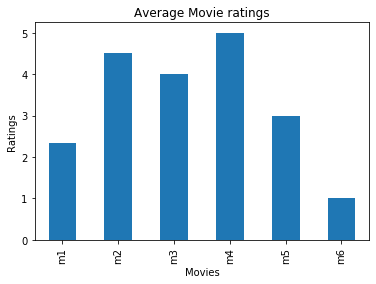

In [116]:
import matplotlib.pyplot as plt
df.groupby('movie_id').mean()['rating'].plot(kind = 'bar',x='movie_id',y='rating',title='Average Movie ratings')
plt.ylabel('Ratings')
plt.xlabel('Movies')
plt.show()

In [117]:
#let us create a movies dataframe
movies = {"movie_id": ["m1","m2","m3","m4","m5","m6","m7","m8","m9","m10"],
          "title": ["The Jungle Book", "The Godfather", "The Untouchables","Enter The Dragon",\
                   "The Scent of a Woman","The Good, The Bad, and The Ugly","The Bourne Supremacy", \
                   "For a Few Dollars More", "The Golden Rendezvous", "Ice Station Zebra"]}
movies_df = pd.DataFrame(movies)
movies_df

,movie_id,title
0,m1,The Jungle Book
1,m2,The Godfather
2,m3,The Untouchables
3,m4,Enter The Dragon
4,m5,The Scent of a Woman
5,m6,"The Good, The Bad, and The Ugly"
6,m7,The Bourne Supremacy
7,m8,For a Few Dollars More
8,m9,The Golden Rendezvous
9,m10,Ice Station Zebra


In [119]:
merged_df = pd.merge(df,movies_df, on ='movie_id')
merged_df

,user_id,movie_id,rating,title
0,1,m1,2,The Jungle Book
1,2,m1,4,The Jungle Book
2,3,m1,1,The Jungle Book
3,1,m2,5,The Godfather
4,4,m2,4,The Godfather
5,2,m3,3,The Untouchables
6,4,m3,5,The Untouchables
7,2,m4,5,Enter The Dragon
8,4,m5,3,The Scent of a Woman
9,4,m6,1,"The Good, The Bad, and The Ugly"


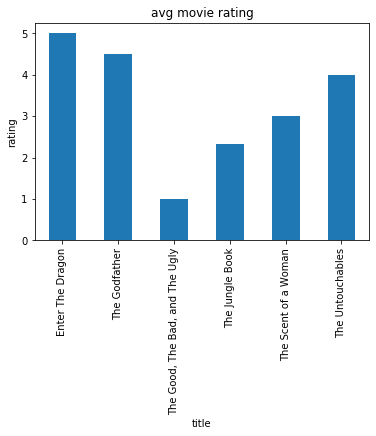

In [125]:
merged_df.groupby('title')['rating'].mean().plot(kind='bar',title='avg movie rating')
plt.ylabel('rating')
plt.show()

In [1]:
import pandas as pd
iris_data = pd.read_csv(r'C:\Users\karan\Desktop\DS ipynb\iris.csv')
iris_data.head()
type(iris_data[['sepallength']])
iris_data.groupby('class').mean()['sepallength']
iris_data.loc[iris_data['sepallength'] > 4.6, ['petallength','petalwidth']]
iris_data.shape

(150, 5)

In [137]:
iris_data.tail()

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [142]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [145]:
iris_data.describe() 

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [146]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petallength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petalwidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [150]:
iris_data.shape

(150, 5)

In [2]:
iris_data.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

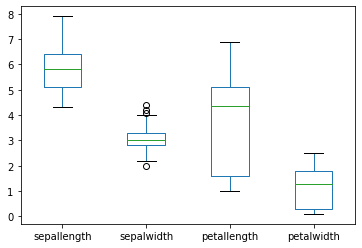

In [152]:
import  matplotlib.pyplot as plt
iris_data.plot(kind = 'box')
plt.show()

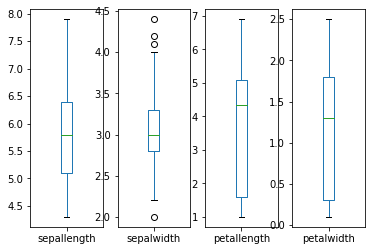

In [153]:
import  matplotlib.pyplot as plt
iris_data.plot(kind = 'box', subplots = True)
plt.show()

In [214]:
iris_data.corr()

,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


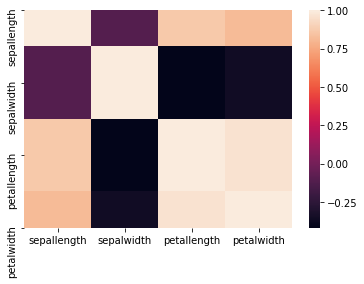

In [169]:
import seaborn as sns
sns.heatmap(iris_data.corr())
plt.show()

In [171]:
iris_data['class'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: class, dtype: int64

In [50]:
# convert categorical to numerical using map and dict
iris_data_copy = iris_data.copy()
print(iris_data_copy.info())  # notice class column is an object type
print('\n')
iris_data_copy['class'] = iris_data['class'].map({'versicolor': 0, 'setosa': 1, 'virginica': 2})
iris_data_copy.head()
#iris_data_copy['class'].value_counts()
iris_data_copy.info()  # now it has become int64 type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [36]:
# convert categorical to numerical using category accessor code
iris_data_copy1 = iris_data.copy()
iris_data_copy1['class'] = iris_data_copy1['class'].astype('category')  ## object type column is converted to category
iris_data_copy1['class'] = iris_data_copy1['class'].cat.codes
print(iris_data_copy1.tail(), '\n')
#iris_data_copy1['class'].value_counts() 
iris_data_copy1.info() ## notice that cat.codes also converted the column to int8

     sepallength  sepalwidth  petallength  petalwidth  class
145          6.7         3.0          5.2         2.3      2
146          6.3         2.5          5.0         1.9      2
147          6.5         3.0          5.2         2.0      2
148          6.2         3.4          5.4         2.3      2
149          5.9         3.0          5.1         1.8      2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null int8
dtypes: float64(4), int8(1)
memory usage: 5.0 KB


In [38]:
from sklearn.preprocessing import LabelEncoder
iris_data_copy2 = iris_data.copy()
encoder = LabelEncoder()
iris_data_copy2['class'] = encoder.fit_transform(iris_data_copy2['class'])
iris_data_copy2.head()
iris_data_copy2['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

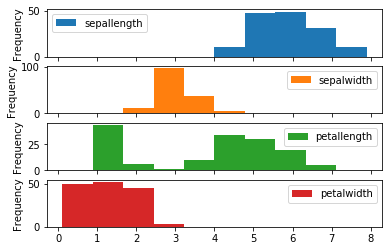

In [204]:
iris_data.columns
iris_data_pred = iris_data[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
iris_data_pred.plot(kind = 'hist', subplots = True)
plt.show()

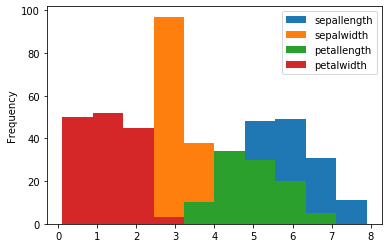

In [205]:
iris_data_pred.plot(kind = 'hist')
plt.show()

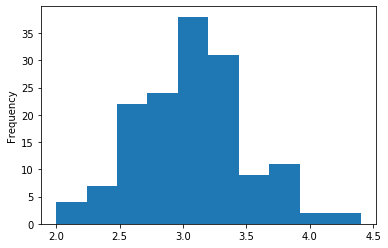

In [206]:
iris_data_pred['sepalwidth'].plot.hist()
plt.show()

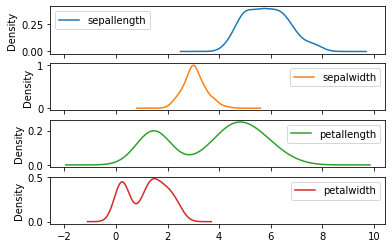

In [207]:
iris_data_pred.plot(kind = 'kde', subplots = True)
plt.show()

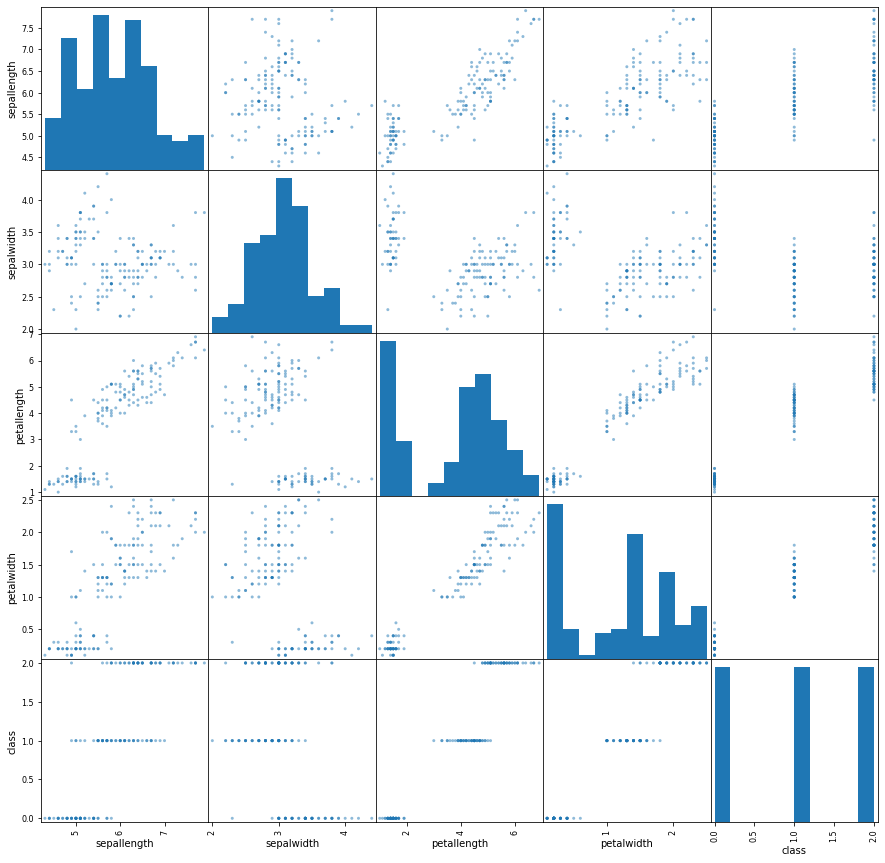

In [212]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data_copy2, figsize = (15,15), diagonal = 'hist')
plt.show()

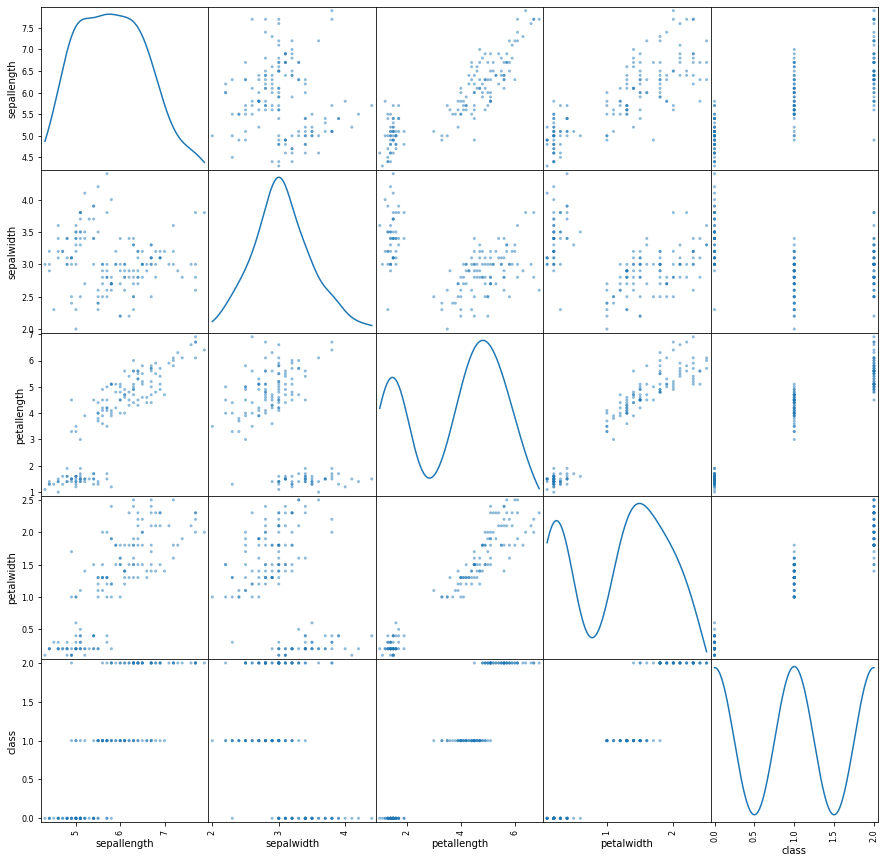

In [211]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris_data_copy2, diagonal = 'kde', figsize=(15,15))
plt.show()

In [2]:
import numpy as np
import pandas as pd
customers = {"Name": ["Doug Walters", "Viv Richards", "Ian Chappell", "Richard Hadlee", "Andy Roberts"],
             "Age": [37, 34, np.nan, 53, 61],
             "Income": [100000.00, 112000.00, 101000.00, 95000.00, 99000.00],
             "CreditHistory": ["Good", "Good", "Good", "Bad", np.nan],
             "Profession": ["Programmer", "Data Analyst", "Data Analyst", "Programmer", "Programmer"]}
#Note: np.nan is used to represent a missing value
customers_df = pd.DataFrame(customers)
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
2,Ian Chappell,NaN,101000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer
4,Andy Roberts,61.0,99000.0,NaN,Programmer


In [233]:
customers_df.loc[:, customers_df.isnull().any()]

,Age,CreditHistory
0,37.0,Good
1,34.0,Good
2,NaN,Good
3,53.0,Bad
4,61.0,NaN


In [231]:
customers_df.loc[:,customers_df.notnull().all()]

,Name,Income,Profession
0,Doug Walters,100000.0,Programmer
1,Viv Richards,112000.0,Data Analyst
2,Ian Chappell,101000.0,Data Analyst
3,Richard Hadlee,95000.0,Programmer
4,Andy Roberts,99000.0,Programmer


In [234]:
customers_df.dropna(axis = 0) # drop rows with null values

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer


In [235]:
customers_df.dropna(axis = 1) # drop columns with null values

,Name,Income,Profession
0,Doug Walters,100000.0,Programmer
1,Viv Richards,112000.0,Data Analyst
2,Ian Chappell,101000.0,Data Analyst
3,Richard Hadlee,95000.0,Programmer
4,Andy Roberts,99000.0,Programmer


In [14]:
mean_age = customers_df['Age'].mean() ## when using mode, pick the first occurance of results mode_age[0]
#mean_age = customers_df['Age'].dropna().mean()
customers_df['Age'] = customers_df['Age'].fillna(mean_age)
customers_df

<class 'float'> 47.6


,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
2,Ian Chappell,53.0,101000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer
4,Andy Roberts,61.0,99000.0,NaN,Programmer


In [16]:
import numpy as np
customers_df.loc[customers_df['Name'] == 'Ian Chappell', 'Age'] = np.nan
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.0,100000.0,Good,Programmer
1,Viv Richards,34.0,112000.0,Good,Data Analyst
2,Ian Chappell,NaN,101000.0,Good,Data Analyst
3,Richard Hadlee,53.0,95000.0,Bad,Programmer
4,Andy Roberts,61.0,99000.0,NaN,Programmer


In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
imputer.fit(customers_df[['Age']])
customers_df['Age'] = imputer.transform(customers_df[['Age']])
customers_df

,Name,Age,Income,CreditHistory,Profession
0,Doug Walters,37.00,100000.0,Good,Programmer
1,Viv Richards,34.00,112000.0,Good,Data Analyst
2,Ian Chappell,46.25,101000.0,Good,Data Analyst
3,Richard Hadlee,53.00,95000.0,Bad,Programmer
4,Andy Roberts,61.00,99000.0,NaN,Programmer


In [20]:
customers_df.loc[customers_df['Name'] == 'Ian Chappell', 'Age'] = np.nan
df = pd.get_dummies(customers_df, columns = ['CreditHistory','Profession'], drop_first=True)
df.loc[df['Name'] == 'Andy Roberts', 'CreditHistory_Good'] = np.nan
df

,Name,Age,Income,CreditHistory_Good,Profession_Programmer
0,Doug Walters,37.0,100000.0,1.0,1
1,Viv Richards,34.0,112000.0,1.0,0
2,Ian Chappell,NaN,101000.0,1.0,0
3,Richard Hadlee,53.0,95000.0,0.0,1
4,Andy Roberts,61.0,99000.0,NaN,1


In [360]:
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000)
df[['Age','CreditHistory_Good']] = fast_knn(df[['Age','CreditHistory_Good']].values, k = 3)
#df[['Age','Income','CreditHistory_Good','Profession_Programmer']] = fast_knn(df[['Age','Income','CreditHistory_Good','Profession_Programmer']].values, k = 3)
df

,Name,Age,Income,CreditHistory_Good,Profession_Programmer
0,Doug Walters,37.000000,100000.0,1.000000,1
1,Viv Richards,34.000000,112000.0,1.000000,0
2,Ian Chappell,39.557181,101000.0,1.000000,0
3,Richard Hadlee,53.000000,95000.0,0.000000,1
4,Andy Roberts,61.000000,99000.0,0.828268,1


In [43]:
import pandas as pd
import numpy as np
#from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
from fancyimpute import KNN
df = pd.get_dummies(customers_df, columns = ['CreditHistory','Profession'], drop_first=True)
df.loc[df['Name'] == 'Andy Roberts', 'CreditHistory_Good'] = np.nan
df[['Age','Income','CreditHistory_Good','Profession_Programmer']] = \
KNN(k=3).fit_transform(df[['Age','Income','CreditHistory_Good','Profession_Programmer']])
df

Imputing row 1/5 with 0 missing, elapsed time: 0.001


,Name,Age,Income,CreditHistory_Good,Profession_Programmer
0,Doug Walters,37.00,100000.0,1.00000,1.0
1,Viv Richards,34.00,112000.0,1.00000,0.0
2,Ian Chappell,46.25,101000.0,1.00000,0.0
3,Richard Hadlee,53.00,95000.0,0.00000,1.0
4,Andy Roberts,61.00,99000.0,0.95236,1.0


In [41]:
import pandas as pd
import numpy as np
#from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
from fancyimpute import KNN 
df = pd.get_dummies(customers_df, columns = ['CreditHistory','Profession'], drop_first=True)
df.loc[df['Name'] == 'Andy Roberts', 'CreditHistory_Good'] = np.nan
nan_matrix = df[['Age','Income','CreditHistory_Good','Profession_Programmer']] 
new_matrix = KNN(k=3).fit_transform(nan_matrix) 
pd.DataFrame(new_matrix, columns = ['Age','Income','CreditHistory_Good','Profession_Programmer'])

Imputing row 1/5 with 0 missing, elapsed time: 0.001


,Age,Income,CreditHistory_Good,Profession_Programmer
0,37.00,100000.0,1.00000,1.0
1,34.00,112000.0,1.00000,0.0
2,46.25,101000.0,1.00000,0.0
3,53.00,95000.0,0.00000,1.0
4,61.00,99000.0,0.95236,1.0


In [48]:
a = [1,2,3,4,5,6,7,0,-1,-5,-6]

a = map(lambda x: 'Y' if x > 1 else 'N', a)
list(a)

['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N']

In [14]:
df = iris_data.copy()
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepalwidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petallength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petalwidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [26]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer

features_names = df.columns[:-1]
features = df[df.columns[:-1]]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(features_scaled, columns = features_names)
df_scaled
features_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [25]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
sepallength,150.0,-2.775558e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepalwidth,150.0,-5.140333e-16,1.00335,-2.438987,-0.587764,-0.124958,0.569251,3.114684
petallength,150.0,1.154632e-16,1.00335,-1.568735,-1.227541,0.336266,0.762759,1.786341
petalwidth,150.0,9.251859e-16,1.00335,-1.444450,-1.181504,0.133226,0.790591,1.710902


In [36]:
import numpy as np

a = np.array([1, 2, 3, 4])
a.shape

(4,)